# Grafieken maken met matplotlib

Voor het visualiseren van gegevens kunnen we grafieken maken. Hiervoor komt de Python library ```matplotlib``` erg goed van toepassing. We beginnen eerst met een staafdiagram.

## De staafdiagram (barchart)
Een staafdiagram is een schematische weergave van gegevens door met staafjes te werken. Hieronder zie je een voorbeeld:
<img src="files/staaf.png">

We gaan nu een staafdiagram maken van de verkoopcijfers van Neo Geo-spellen. Dat doen we als volgt:
* We selecteren eerst alle Neo Geo spellen ```dfGames3Kolommen.Platform == "NG"```
* Uiteindelijk maken we het staafdiagram door ```dfGamesNG.plot(kind="bar")``` in te geven.

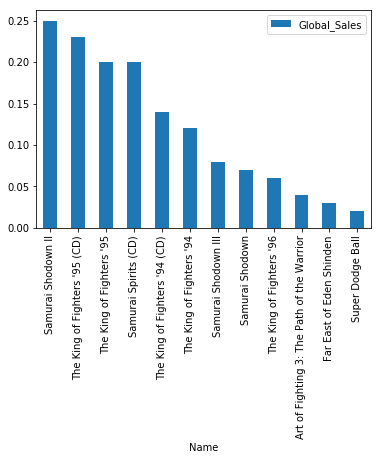

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

dfGames = pd.read_csv("games.csv")
kolommen = ["Name", "Platform", "Global_Sales"]

dfGames3Kolommen = dfGames[kolommen]
dfGamesNG = dfGames3Kolommen[dfGames3Kolommen.Platform == "NG"]
dfGamesNG.plot(kind="bar", x="Name", y="Global_Sales")

plt.show()

In de x-as hebben we de namen van de spellen. De staafjes geven de globale verkoopcijfers weer in miljoenen euro's.

### Opdracht 
Maak een staafdiagram waarbij je de verkoopcijfers van de best verkochte 20 PS3 spellen laat zien.

## Horizontaal staafdiagram
Je kunt de staafdiagram ook horizontaal maken. Dan verander je ```kind="bar"``` naar ```kind="barh"```. Zie:  ```dfGamesNG.plot(kind="barh")```


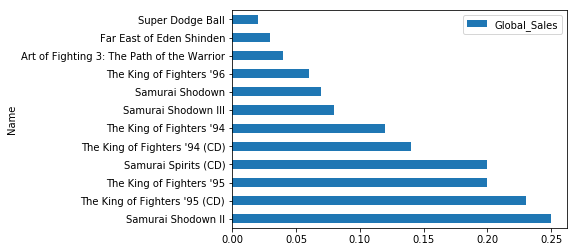

In [5]:
dfGamesNG.plot(kind="barh", x="Name", y="Global_Sales")

plt.show()

## Samenvattingsfuncties
Stel dat je wilt weten hoeveel geld alle PS3 spellen bij elkaar hebben opgeleverd in Europa. Hoe doe je dit dan? 
* Stap 1: Eerst alle PS3-spellen selecteren
* Stap 2: Roep vervolgens de methode ```sum()``` op.

In [6]:
dfGamesPS3 = dfGames3Kolommen[dfGames3Kolommen.Platform == "PS3"]
dfGamesPS3.sum()

Name            Grand Theft Auto VCall of Duty: Black Ops IICa...
Platform        PS3PS3PS3PS3PS3PS3PS3PS3PS3PS3PS3PS3PS3PS3PS3P...
Global_Sales                                               939.43
dtype: object

Wat is er gebeurd? De methode ```sum()``` telt alle waarden in alle kolommen bij elkaar op. We hadden drie kolommen en dus worden al die waarden van die drie kolommen per kolom bij elkaar opgeteld. Dus alle PS3 spelnamen zijn bij elkaar opgeteld, alle Platforms ("PS3") en alle EU_Sales bedragen. 

Omdat we alleen zijn geïnteresseerd in de optelling van de ```EU_Sales``` hadden we ook dit kunnen doen:

In [8]:
kolommen = ["Name", "Platform", "EU_Sales"]

dfGames3Kolommen = dfGames[kolommen]
dfGamesPS3 = dfGames3Kolommen[dfGames3Kolommen.Platform == "PS3"]
dfGamesPS3["EU_Sales"].sum()

330.2899999999974

### Opdracht
* Schrijf een programma dat een overzicht maakt van de verkoopcijfers in Japan, Europa en Noord Amerika voor de volgende Platforms: NES, SNES, Wii
* Schrijf nu een programma dat de gemiddelde globale(Global_Sales) verkoopcijfers voor de Platforms Wii en PS3 weergeeft.

Naast ```sum()``` en ```mean()``` kun je natuurlijk ook andere samenvattingsfuncties aanroepen. In de vorige les is dit ook al behandeld.

## Groeperen
Het lastige van de vorige opgave is dat je voor elk Platform de optelling moet gaan berekenen. Kan dat niet makkelijker? Jazeker! Je kunt namelijk groeperen op basis van een bepaalde kolom! Groeperen betekent dat je de rijen in de DataFrame in groepjes gaat verdelen op basis van de waarden in een bepaalde kolom. Vervolgens kunnen we de som van elke groep berekenen. Kijk maar eens:

In [9]:
kolommen = ["Platform", "EU_Sales", "JP_Sales", "NA_Sales", "Global_Sales"]

dfGamesSales = dfGames[kolommen]
print (dfGamesSales.groupby("Platform").sum())

          EU_Sales  JP_Sales  NA_Sales  Global_Sales
Platform                                            
2600          5.47      0.00     90.60         97.08
3DO           0.00      0.10      0.00          0.10
3DS          61.48    100.67     83.49        259.09
DC            1.69      8.56      5.43         15.97
DS          188.89    175.57    382.67        807.10
GB           47.82     85.12    114.32        255.45
GBA          75.25     47.33    187.54        318.50
GC           38.71     21.58    133.46        199.36
GEN           6.05      2.70     21.05         30.78
GG            0.00      0.04      0.00          0.04
N64          41.06     34.22    139.02        218.88
NES          21.15     98.65    125.94        251.07
NG            0.00      1.44      0.00          1.44
PC          142.44      0.17     94.53        260.30
PCFX          0.00      0.03      0.00          0.03
PS          213.61    139.82    336.52        730.68
PS2         339.29    139.20    583.84       1

Het eerste waar je op moet letten is dat de index is ingesteld op de kolom waarop je hebt gegroepeerd. In dit geval is dat dus de kolom "Platform". Per Platform zijn de waarden opgeteld voor ```EU_Sales```, ```JP_Sales``` etc. We zouden er nu ook een staafdiagram van kunnen maken:

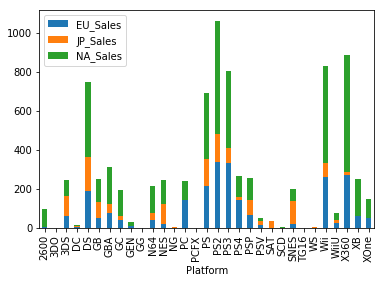

In [10]:
kolommen = ["Platform", "EU_Sales", "JP_Sales", "NA_Sales"]

dfGames3Kolommen = dfGames[kolommen]
dfGamesPerPlatform = dfGames3Kolommen.groupby("Platform")
dfGamesGrouped = dfGamesPerPlatform.sum()

dfGamesGrouped.plot(kind="bar", stacked=True)
plt.show()

_Uitleg:_
We hebben een nieuw argument meegegeven aan de plot functie. dfGamesGrouped.plot(kind="bar", stacked=True)
Met stacked=True zorg je dat de staafjes die behoren tot hetzelfde jaartal bij elkaar worden opgestapeld. Vergelijk het maar eens met de grafiek die je krijgt als je stacked=True weglaat.

### Opgave
Maak nu eens een grafiek waarmee je per genre aangeeft hoeveel spellen er zijn gemaakt. Je moet hiervoor de functie count() gebruiken.
Maak nu een andere grafiek waarin je per jaar aangeeft wat het gemiddelde aantal spellen zijn die zijn uitgebracht. Hiervoor gebruik je de functie mean()

## Cirkeldiagrammen (piecharts)
Een cirkeldiagram is een schematische weergave van gegevens in een cirkel.
Hieronder zie je een voorbeeld.

<img src="files/cirkel.png">

Cirkeldiagrammen zijn het meest geschikt wanneer de verschillende categorieën sterk in grootte verschillen. Wanneer de categorieën (ongeveer) even groot zijn is een staafdiagram een geschikter.

We gaan nu een cirkeldiagram maken waarbij we zien wat de omzet is van de vier meest opgeleverde games in een bepaalde genre.

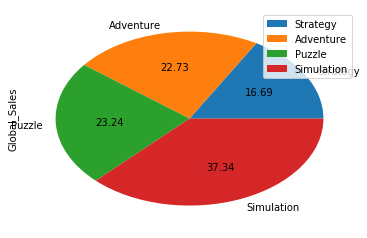

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

dfGames = pd.read_csv("games.csv")
kolommen = ["Genre", "Global_Sales"]

dfGamesKolommen = dfGames[kolommen]
dfGamesPerGenre = dfGamesKolommen.groupby("Genre")
dfGamesGrouped = dfGamesPerGenre.sum().sort_values(by="Global_Sales") # sorteren
dfGamesGrouped = dfGamesGrouped[0:4] # de eerste vier pakken. zelfde als head(4)
dfGamesGrouped.plot(kind="pie", y="Global_Sales", autopct='%.2f', fontsize=10)
plt.show()

_Uitleg:_
* We selecteren alleen de kolommen Genre en Global_Sales
* Nadat we de sum() methode hebben aangeroepen sorteren we de waarden ook met de methode sort_values(). Als argument moet je meegeven op welke kolom je de lijst wilt sorteren. dfGamesPerGenre.sum().sort_values(by="Global_Sales")
* Er zijn veel verschillende genres en ons cirkeldiagram zou heel onoverzichtelijk worden als we alle genres willen laten zien. Daarom pakken we met slicing de eerste vier met dfGamesGrouped = dfGamesGrouped[0:4]. We hadden dit ook met de methode head(4) kunnen doen overigens.
* Met de regel dfGamesGrouped.plot(kind="pie", y="Global_Sales", autopct='%.2f', fontsize=10)  zorgen we dat er een taartdiagram (piechart) wordt gemaakt op basis van Global_Sales. Het percentage dat toegekend moet worden heeft twee cijfers achter de komma (autopct='%.2f') en de lettertypegrootte is 10px.


We kunnen ook meerdere kolommen selecteren en voor elke kolom een aparte cirkeldiagram laten maken. Dit is handig als je wilt vergelijken. 


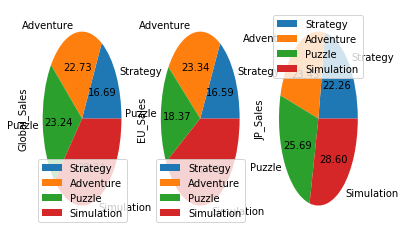

In [12]:
kolommen = ["Genre", "Global_Sales", "EU_Sales", "JP_Sales"]

dfGamesKolommen = dfGames[kolommen]
dfGamesPerGenre = dfGamesKolommen.groupby("Genre")
dfGamesGrouped = dfGamesPerGenre.sum().sort_values(by="Global_Sales") # sorteren
dfGamesGrouped = dfGamesGrouped[0:4] # de eerste vier pakken (slicing)
dfGamesGrouped.plot(kind="pie", subplots=True, autopct='%.2f', fontsize=10)
plt.show()

_Uitleg:_
De functie ```plot()``` heeft nu een nieuw argument gekregen: ```subplots=True```. Dit zorgt ervoor dat voor elke kolom een aparte cirkeldiagram wordt gemaakt. Zoals je ziet zijn simulatiespellen in Europa veel populairder dan in Japan.